# Online Shoppers Purchasing Intention
**By Ibrahim Youssef**

The goal of this notebook is to build a Model to predict the current if the customer brings in revenue to the site or not based on the features we have and then export that model and interpret the model to know which variables effects the revenue more than others    

# Get the Toolkit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
 warnings.filterwarnings("ignore")

In [3]:
#url='https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
data=pd.read_csv('online_shoppers_intention.csv')
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Dataset Information 
The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period. 
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# First Look at the Data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:>

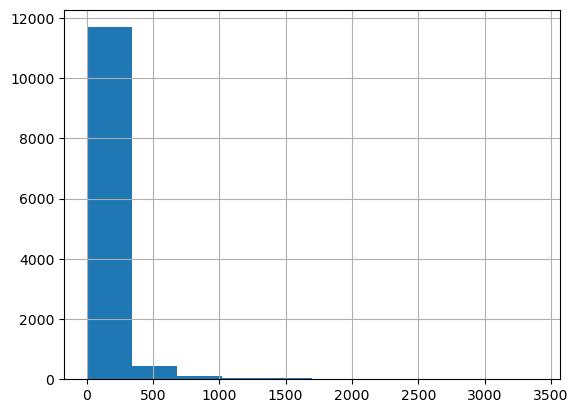

In [6]:
data['Administrative_Duration'].hist()

# Data Cleaning

we seem to have a problem with some of the max values in the duration period for each page for example the maximum number in the Administrative_Duration is   

## Outliers

In [7]:
max_ad=data['Administrative_Duration'].max()
max_ad

3398.75

assuming this value is in seconds as this will be the highest logical value for this number to be in lets convert it to hours to get a better idea on how long the longest stay on this page was

In [8]:
(max_ad/60)/60

0.9440972222222223

looking at this value we  can conclude that it's within the realm of logic 

But the max value for ProductRelated_Duration looks very concerning

which is 

In [9]:
max_pr=data['ProductRelated_Duration'].max()
max_pr

63973.52223

doing the same thing we did with the previous  with the 

In [10]:
max_pr/60/60

17.77042284166667

let's also look at the highest numbers in the ProductRelated_Duration for better context of the top end of the distribution

In [11]:
data_duration=data[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']]
data_duration.sort_values(by='ProductRelated_Duration',ascending=False).head(10)

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
8071,3398.750000,2549.375000,63973.52223
5152,2629.253968,2050.433333,43171.23338
9238,2657.318056,1949.166667,29970.46597
8784,1307.675000,132.666667,27009.85943
8308,853.735949,126.500000,24844.15620
7662,1251.200000,250.000000,23888.81000
6684,199.456273,299.033333,23342.08205
6165,2407.423810,434.300000,23050.10414
5916,245.733333,1511.700000,21857.04648
8972,631.416667,1037.150000,21672.24425


We see that the duration align together with what is logical on a platform usage 

## Type Converts

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Looking at the Dtypes we need to convert the last two (Weekend, Revenue) from bool to 0 and 1 values to have an all the needed values be numerical

In [13]:
bo=data.select_dtypes(include='bool').columns.to_list()
data[bo]=data[bo].astype('int')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Now we are ready for the analysis but before the model training we need to convert the month and visitor type to numerical too using get_dummies all in the feature engineering step 

# Exploratory Data Analysis

## correlation between variables 

<AxesSubplot:>

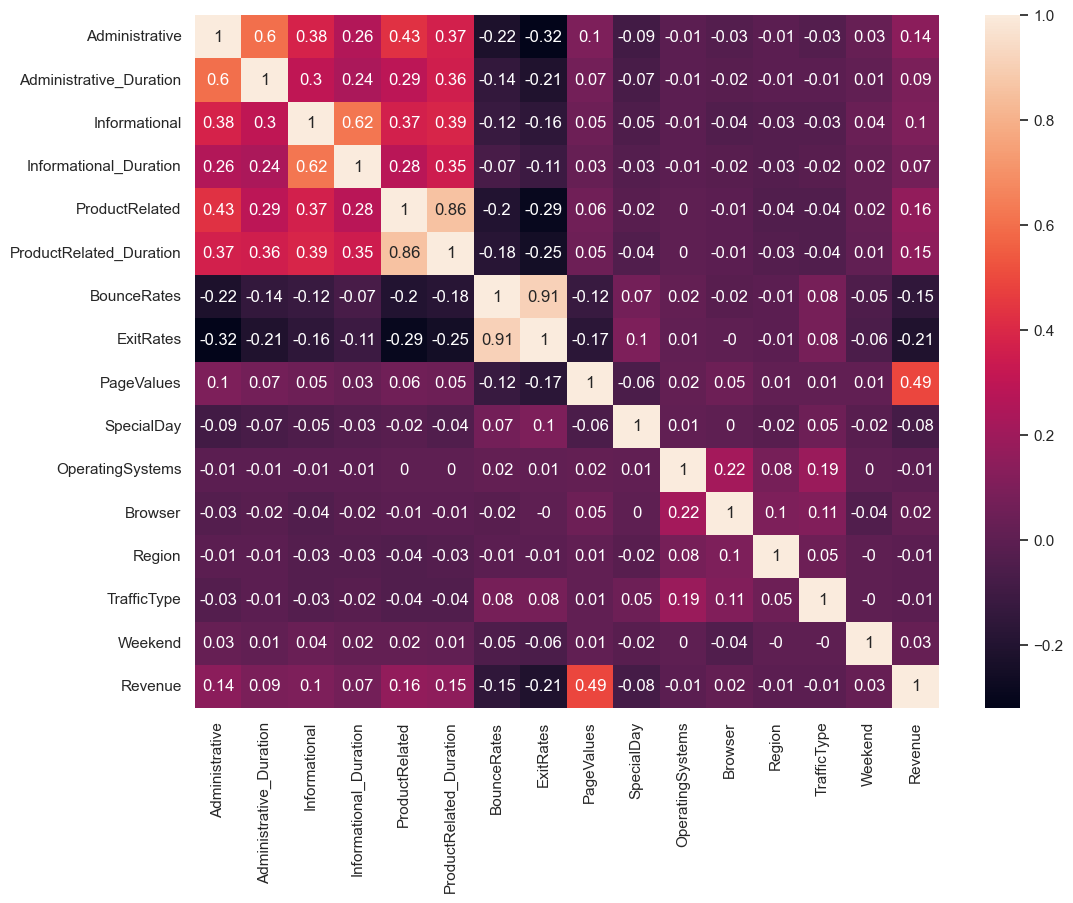

In [15]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data.corr().round(2),annot=True)


- We see that every page with it's duration have a higher positive correlation with the page each and among each others 
- The page value is highly correlated with the revenue
- The Exit rate and bounce rate are highly positivly correlated with each other 

## Let's visualize the pages and their durations?

In [16]:
data.columns.to_list()

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

Text(0, 0.5, 'Number')

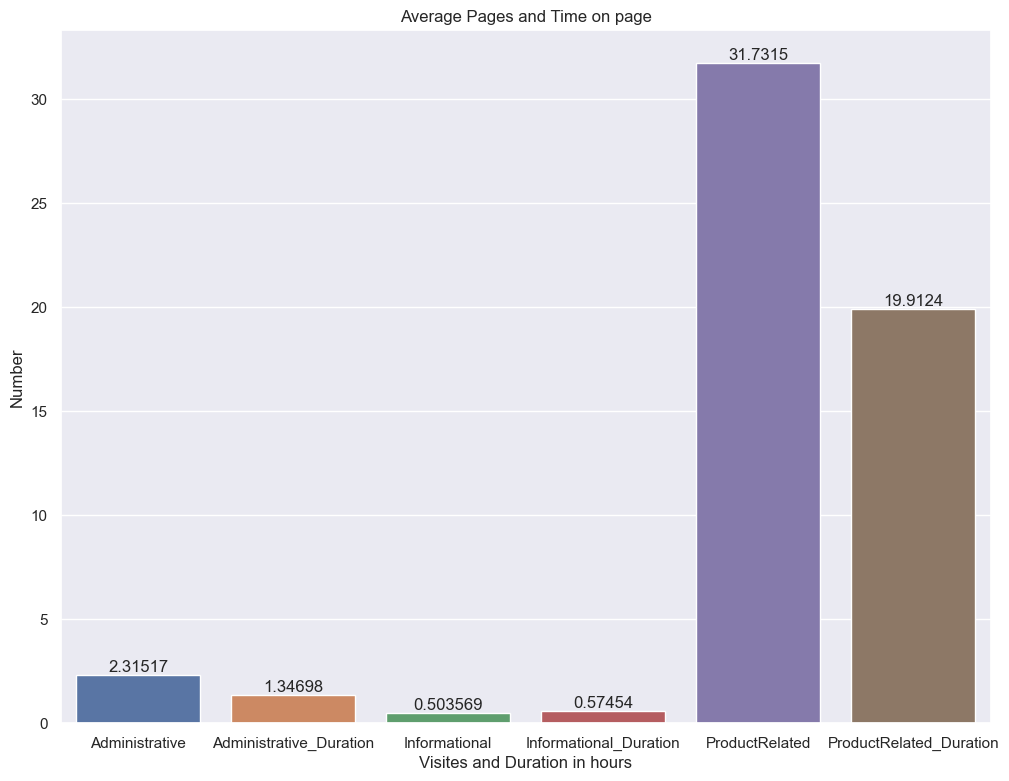

In [17]:
pages=['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration']
duration=['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated_Duration']



page_data=data[pages]
page_data[duration]=page_data[duration]/60
page_data=page_data.mean().reset_index()



#ax=sns.bar()
ax=sns.barplot(data=page_data,y=0,x='index')
ax.bar_label(ax.containers[0])
plt.title('Average Pages and Time on page')
plt.xlabel('Visites and Duration in hours')
plt.ylabel('Number')

let's look at the pair plots of the data before we choose the model and add polynomial features  

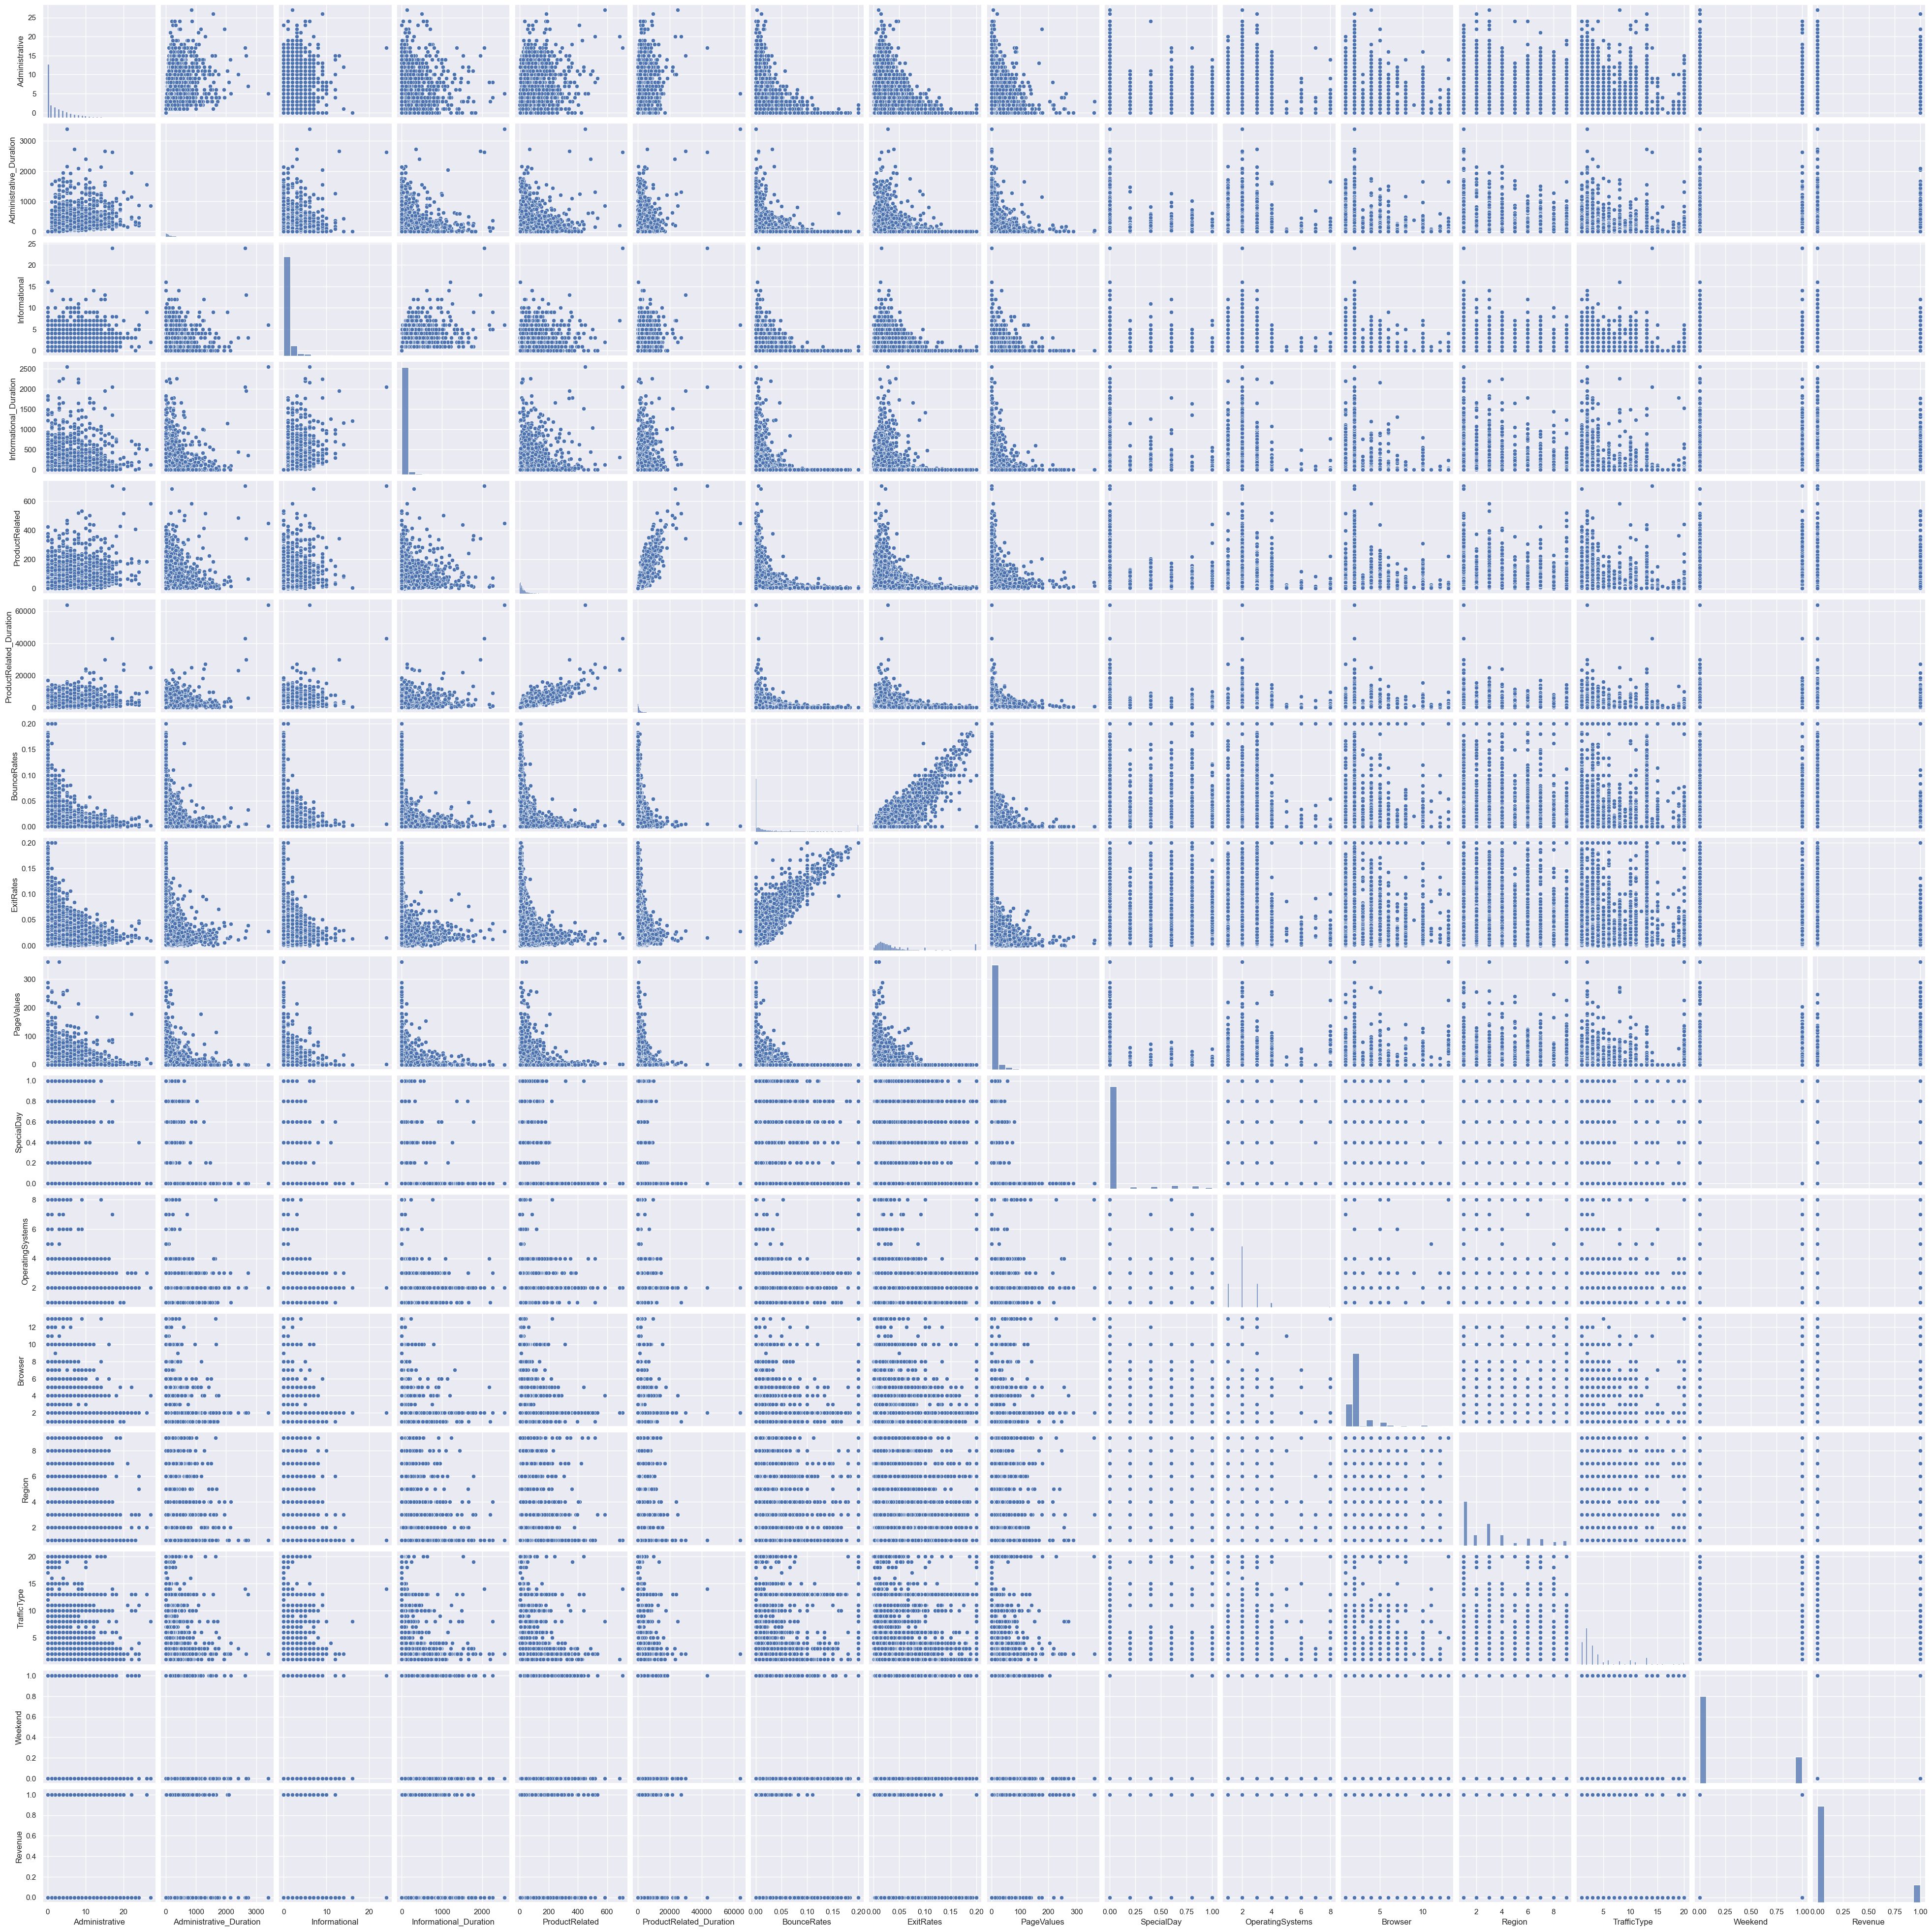

In [18]:
sns.pairplot(data)

# Feature Engineering

## Get Dummies

In [19]:
list_m=['OperatingSystems','Browser','Region','TrafficType']

In [20]:
obj=data.select_dtypes(include='object').columns.to_list()

for i in list_m:
    obj.append(i)

In [21]:
obj

['Month',
 'VisitorType',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [22]:
data_f=pd.get_dummies(data=data,columns=obj,drop_first=False)


In [23]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  Weekend                        12330 non-null  int32  
 11  Revenue                        12330 non-null  int32  
 12  Month_Aug                      12330 non-null 

# Classification Model

We will build a Supervised classification model to with a target of Revenue this is to find which 
Looking at the data we seem to have a small sample 

## Get The tool kit for Machine Learning

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Split the Data

In [25]:
y_list=data_f.columns.to_list()
y_list.remove('Revenue')
x=data_f[y_list]
y=data_f[['Revenue']]

## Scaling the Data 

In [26]:
sc=StandardScaler()
sc

StandardScaler()

In [27]:
x_scale=sc.fit_transform(x)

In [28]:
x_scale

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.02849014,
        -0.03715716, -0.12775161]])

## Test and Train split

In [29]:
x_train,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
x_train1,x_test1 ,y_train1,y_test1=train_test_split(x_scale,y,test_size=0.3,random_state=42)

# Logistic Regression Without scaler

## Fit the Model 

In [31]:
lr=LogisticRegression()
lr

LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

LogisticRegression()

## Test Model

In [33]:
y_pred=lr.predict(x_test)

In [34]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[3056,  367],
       [  68,  208]], dtype=int64)

<AxesSubplot:>

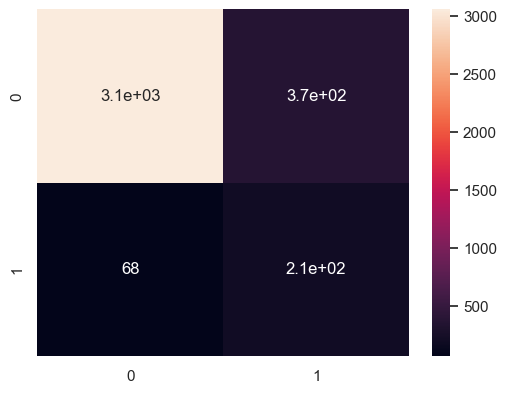

In [35]:
sns.set(rc={'figure.figsize':(6,4.5)})
sns.heatmap(cm,annot=True)

In [36]:
print('The model Accuracy is ',lr.score(x_test,y_test)*100,'%')

The model Accuracy is  88.24006488240065 %


# Logistic Regression With Scaler

## Fit the Model 

In [37]:
lr1=LogisticRegression()
lr1

LogisticRegression()

In [38]:
lr1.fit(x_train1,y_train1)

LogisticRegression()

## Test Model

In [39]:
y_pred1=lr1.predict(x_test1)

In [40]:
cm1=confusion_matrix(y_pred1,y_test1)
cm1

array([[3054,  374],
       [  70,  201]], dtype=int64)

<AxesSubplot:>

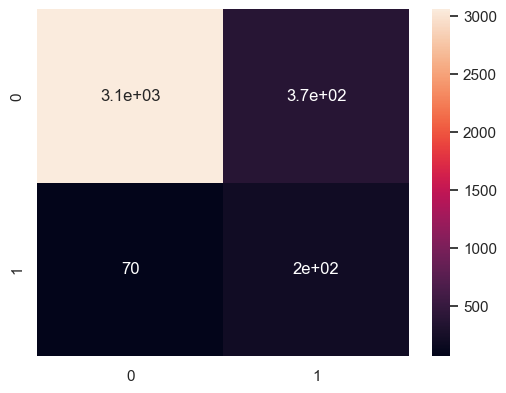

In [41]:
sns.set(rc={'figure.figsize':(6,4.5)})
sns.heatmap(cm1,annot=True)

In [42]:
print('The model Accuracy is ',lr1.score(x_test1,y_test1)*100,'%')

The model Accuracy is  87.99675587996757 %


In [43]:
print('the differance between the models is',((lr1.score(x_test1,y_test1))-(lr.score(x_test,y_test)))*100,'%')

the differance between the models is -0.24330900243308973 %


# Model Comparisons 

to look at this model objectively we need to look of the worst case that these model can predict and try to minimize it
and in this case is the false negatives which is in the bottom left corner of the confusion matrix 

#### Logistic regression no Stander Scaling

In [44]:
cm

array([[3056,  367],
       [  68,  208]], dtype=int64)

#### Logistic regression with Stander scaling

In [45]:
cm1

array([[3054,  374],
       [  70,  201]], dtype=int64)

# Building Model Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [47]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)

In [48]:
sc1=StandardScaler()
x_pipe=sc1.fit_transform(x_poly)

In [49]:
lr2=LogisticRegression(C=1)
lr2.fit(x_pipe,y_train)

LogisticRegression(C=1)

In [50]:
pipe=Pipeline([('Polynomial',poly),('StanderScaler',sc1),('Logistic_Regression',lr2)])

In [51]:
print ('The model Accuracy is ',pipe.score(x_test,y_test)*100,'%')

The model Accuracy is  85.83400919167342 %


# Cross validation score

In [52]:
from sklearn.model_selection import cross_val_score,KFold ,cross_val_predict
from sklearn.metrics import r2_score

In [53]:
kf=KFold(shuffle=True,random_state=42,n_splits=3)
kf

KFold(n_splits=3, random_state=42, shuffle=True)

In [54]:
pred_est=cross_val_predict(pipe,x,y,cv=kf)
pred_est

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
print('The cross Validation score is ',cross_val_score(pipe,x,y,cv=kf).mean()*100,'%')

The cross Validation score is  86.29359286293592 %


In [56]:
print ('The model Accuracy is ',pipe.score(x_test,y_test)*100,'%')

The model Accuracy is  85.83400919167342 %


Let's Tune the model to get the best result out of this model 

# Model Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
para={'Polynomial__degree':[1,2,3],'Logistic_Regression__C':[1,2,3]}

In [59]:
est_grid=GridSearchCV(pipe,para,cv=kf)

In [60]:
est_grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                                       ('StanderScaler', StandardScaler()),
                                       ('Logistic_Regression',
                                        LogisticRegression(C=1))]),
             param_grid={'Logistic_Regression__C': [1, 2, 3],
                         'Polynomial__degree': [1, 2, 3]})

In [61]:
est_grid.best_score_

0.883617193836172

In [62]:
est_grid.best_estimator_

Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=1)),
                ('StanderScaler', StandardScaler()),
                ('Logistic_Regression', LogisticRegression(C=2))])

In [63]:
best_pipe=Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=1)),
                ('StanderScaler', StandardScaler()),
                ('Logistic_Regression', LogisticRegression(C=2))])

# Interpreting the Model 

In [64]:
coef=lr1.coef_
coef

array([[-4.20387079e-02,  3.57902834e-03,  8.58488238e-02,
        -1.14504715e-02,  5.67350748e-03,  1.79722114e-01,
        -8.65521841e-02, -8.28954599e-01,  1.48941288e+00,
        -6.56782946e-02,  2.80290356e-02,  5.51110794e-02,
        -1.40709796e-01, -2.41836180e-01,  5.57742843e-02,
        -1.70210320e-02, -1.53482230e-01, -1.05447838e-01,
         3.13999672e-01,  6.84080285e-02,  7.47132434e-02,
         3.45726074e-02,  1.39784906e-03, -3.42013508e-02,
         8.20205068e-02,  3.12308710e-02, -8.64984418e-02,
         1.76730852e-02,  5.78610054e-03, -6.05428101e-03,
        -8.25171625e-02, -1.91016597e-01, -4.06552568e-02,
         1.00422930e-02, -6.65513548e-02,  2.46526309e-02,
         3.54102673e-02, -4.37242515e-02,  3.38498092e-02,
        -2.89770778e-03, -3.56579841e-02,  1.98505195e-02,
         5.78610054e-03,  4.70012054e-02,  6.95734471e-02,
         1.88474840e-02,  4.06940026e-02, -1.53414394e-02,
        -1.46077103e-02, -6.13771565e-02,  6.47845113e-0

In [65]:
x_columns=x.columns
x_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'OperatingSystems_1',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',

In [66]:
int_lr1=pd.DataFrame(data=coef,columns=x_columns).T
int_lr1=int_lr1.reset_index()

In [67]:
int_lr1

,index,0
0,Administrative,-0.042039
1,Administrative_Duration,0.003579
2,Informational,0.085849
3,Informational_Duration,-0.011450
4,ProductRelated,0.005674
...,...,...
69,TrafficType_16,0.029258
70,TrafficType_17,-0.035854
71,TrafficType_18,-0.125463
72,TrafficType_19,-0.032266


Text(0, 0.5, 'Variables')

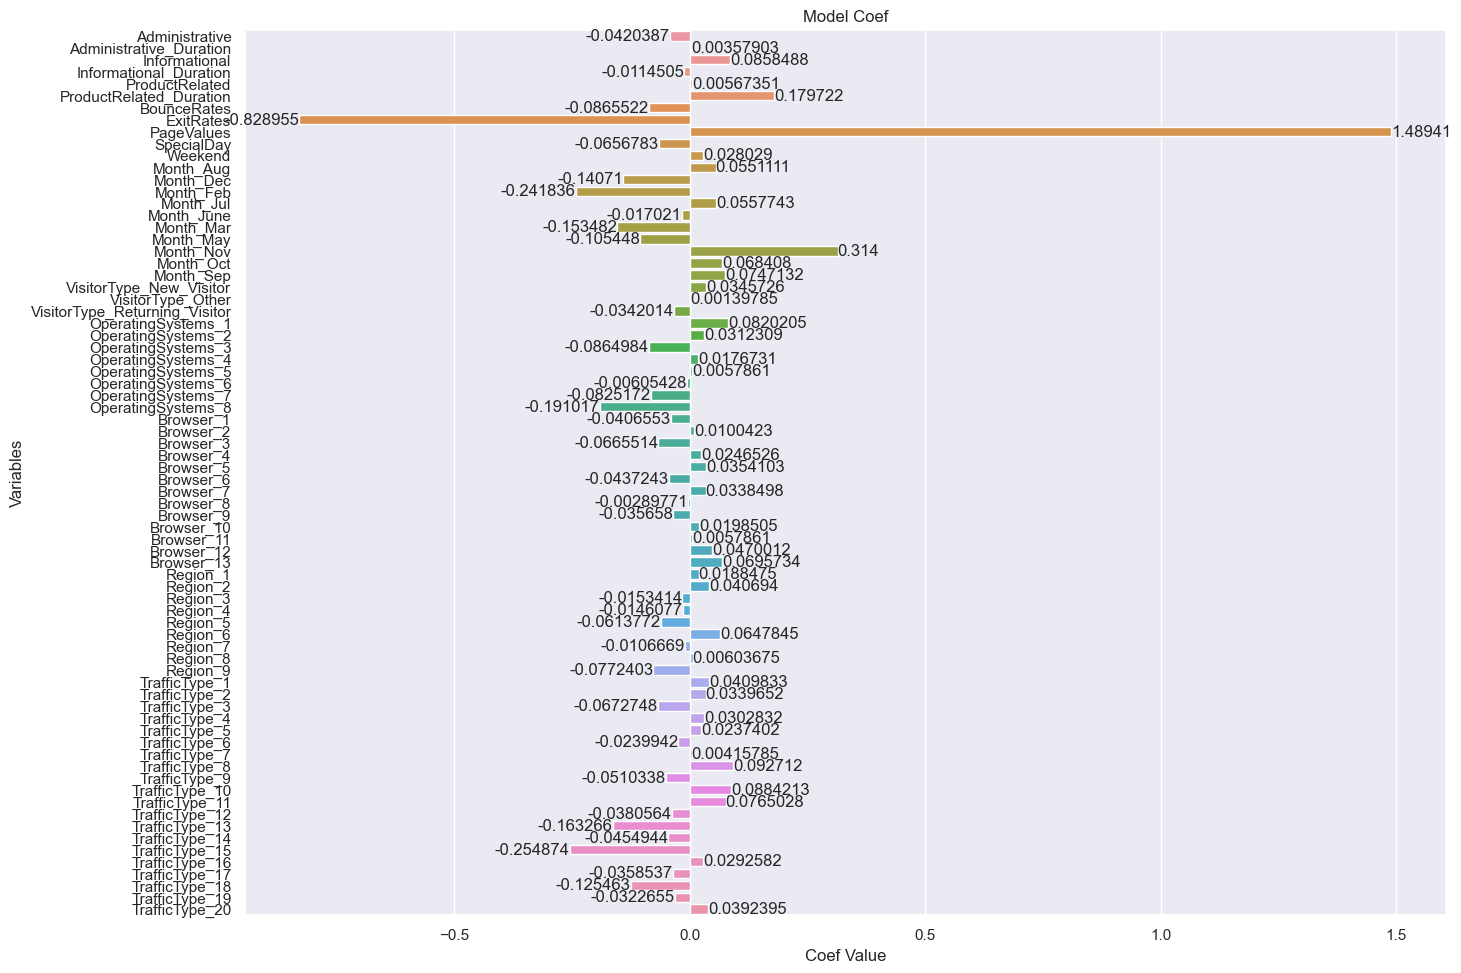

In [68]:
sns.set(rc={'figure.figsize':(15.5,11.5)})
ax=sns.barplot(data=int_lr1,y='index',x=0)
ax.bar_label(ax.containers[0])
plt.title('Model Coef')
plt.xlabel('Coef Value')
plt.ylabel('Variables')

# Exproting Model for us

In [69]:
import joblib

In [70]:
joblib.dump(best_pipe,'Classification Model for Revenue')

['Classification Model for Revenue']